# Text Analysis on Wine Data Using NLP

Wine is a treat that many adults enjoy drinking from time to time. Especially with all the different kinds of wine available to drink, there are things that we may not know. The goals of this notebook include:

* Finding the relationship between countries and wine ratings
* Analyze keywords using description to see what are the important words
* Does length of review have any correlation with the rating given
* Does price of wine correlate to


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reviews = pd.read_csv('winemag-data_first150k.csv')
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


# Data Cleaning

In [4]:
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
#Drop any duplicate entries as there would already be a copy of it in the dataset.
reviews = reviews.drop_duplicates()

We will check for NaN/None values in country, price, and points. As we are analyzing these points specifically, we do not want any NaN/none values present. So if they are present, we will remove those rows with the NaN values. Once we have checked those, we will take a look at the rest of the data to see if any more cleaning needs to be done.

In [6]:
reviews[pd.isnull(reviews['country'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [7]:
reviews = reviews.dropna(axis=0, how='any', subset=['country'])

In [8]:
reviews[pd.isnull(reviews['price'])].head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita


In [9]:
reviews = reviews.dropna(axis=0, how='any', subset=['price'])

In [10]:
reviews[pd.isnull(reviews['points'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery


In [16]:
reviews[pd.isnull(reviews['Unnamed: 0'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery


After checking all the numerical object typed columns and cleaned them so they do not contain null values, it is time to start breaking down the text description.

We will:
* Create a new column that holds the description length

In [19]:
reviews['descr length'] = reviews['description'].apply(len)

Create a box plot that will show us the different countries that have produced wine and have had customers leave reviwes. This will give us a slight statistical overview of the number of reviews but also the demographic.

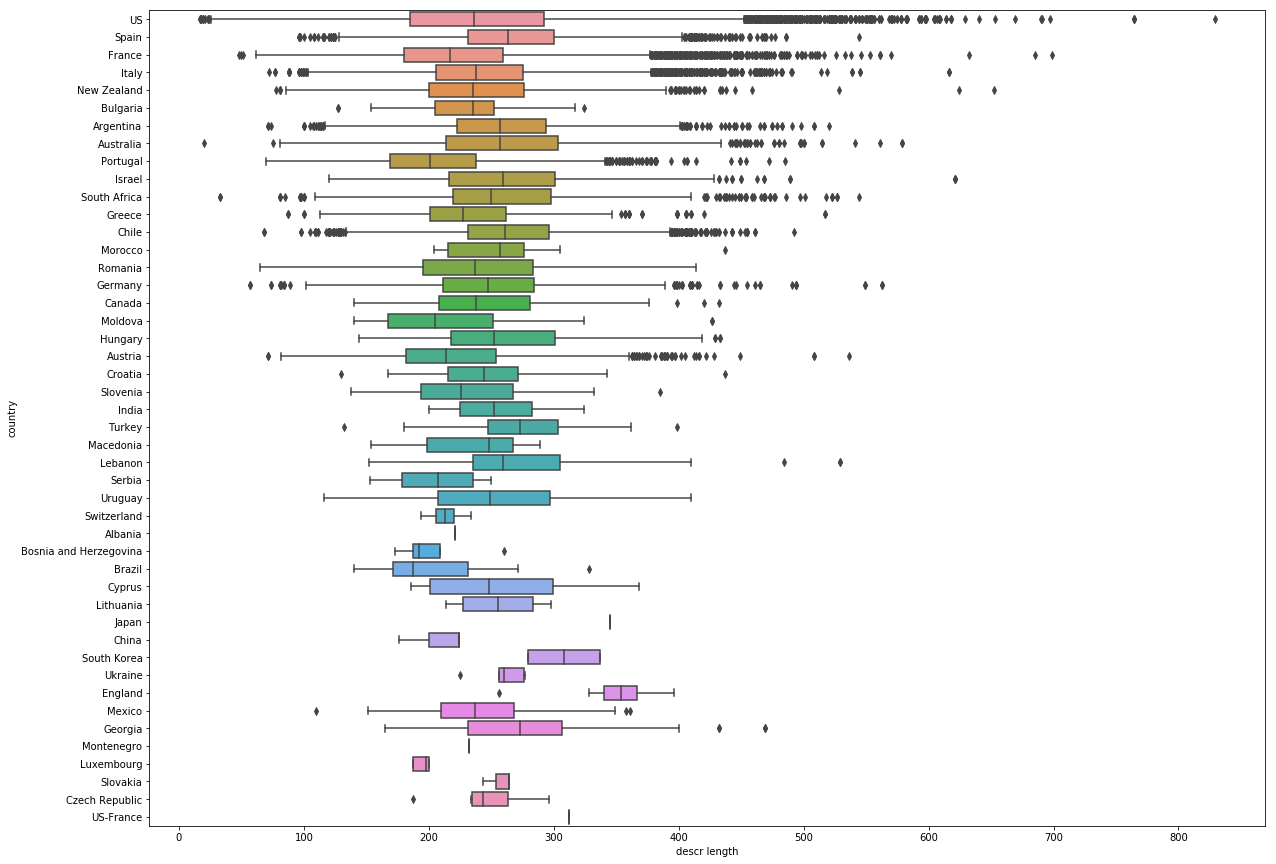

In [20]:
plt.figure(figsize=(20,15))
sns.boxplot(x='descr length', y='country', data=reviews)

In [22]:
reviews['country'].value_counts().sum()

137230

# Text Preprocessing

In [23]:
import string
from nltk.corpus import stopwords

In [24]:
def process_text(reviews):
   nopunc = [char for char in reviews if char not in string.punctuation]
   nopunc = "".join(nopunc)
   return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer = CountVectorizer(analyzer=process_text).fit(reviews['description'])
print(len(bow_transformer.vocabulary_))

48778


In [27]:
description_bow = bow_transformer.transform(reviews['description'])

KeyboardInterrupt: 

In [ ]:
print('Shape of Sparse Matrix: ', description_bow.shape)
print('Amount of Non-Zero occurences: ', description_bow.nnz)

In [ ]:
sparsity = (100.0 * description_bow.nnz / (description_bow.shape[0] * description_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer